# Leads Score Case Study

#### Problem Statement
X Education sells online courses to industry professionals. The company needs to identify the most promising leads, that is, the leads which will convert to paying customers. <br>
Also, a lead score is assigned to each lead, such that, the customer with higher lead score is more tentative to convert.

# Step 1: Reading and Understanding the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_info_columns',500)

#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Importing  datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_data.shape

(9240, 37)

In [5]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleaning

In [7]:
#few categorical columns have one of the values as "Select".This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
leads_data = leads_data.replace('Select', np.nan)

In [8]:
#Print the null percentage of each column of leads_data
leads_na=round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)
leads_na.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                      1.48 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Lead Source                                      0.39 
Lead Origin                                      0.00 
Lead Numbe

In [9]:
#Getting the list of  columns with missing values greater than 70%
leads_na_greater= leads_na[round(100*(leads_data.isnull().sum()/len(leads_data.index)),2) >= 70].to_frame().index.tolist()
leads_na_greater

['How did you hear about X Education', 'Lead Profile']

In [10]:
#Dropping the columns with more than 70% data missing

leads_data.drop( leads_na_greater, axis =1, inplace=True)
leads_data.shape


(9240, 35)

#### Now we will take care of null values in each column one by one.


##### `Lead Quality`: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [11]:
print(leads_data['Lead Quality'].describe())

count     4473    
unique    5       
top       Might be
freq      1560    
Name: Lead Quality, dtype: object


In [12]:
print(leads_data['Lead Quality'].isnull().sum())

4767


Lead Quality is based on the employee intuition. So all the left blank values and NaN i.e; 4767 can be replaced with "Not Sure"

In [13]:
leads_data['Lead Quality'] = leads_data['Lead Quality'].replace(np.nan, "Not Sure")

In [14]:
leads_data['Lead Quality']= leads_data['Lead Quality'].replace("Might be", "Not Sure")
leads_data['Lead Quality'].value_counts()

Not Sure             7419
High in Relevance    637 
Worst                601 
Low in Relevance     583 
Name: Lead Quality, dtype: int64

`Asymmetrique Activity Index`,`Asymmetrique Profile Index`, `Asymmetrique Activity Score` and `Asymmetrique Profile Score` ::  
An index and score assigned to each customer based on their activity and their profile


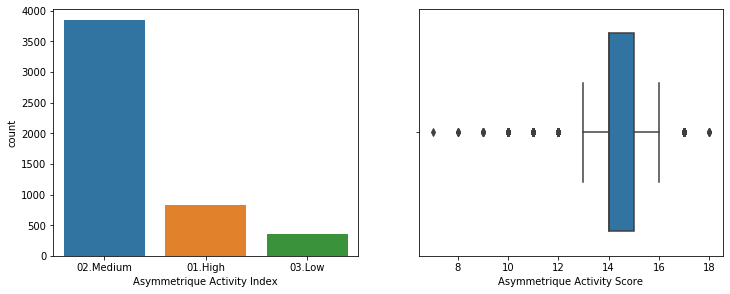

In [15]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.countplot(leads_data['Asymmetrique Activity Index'])
plt.subplot(2,2,2)
sns.boxplot(leads_data['Asymmetrique Activity Score'])
plt.show()

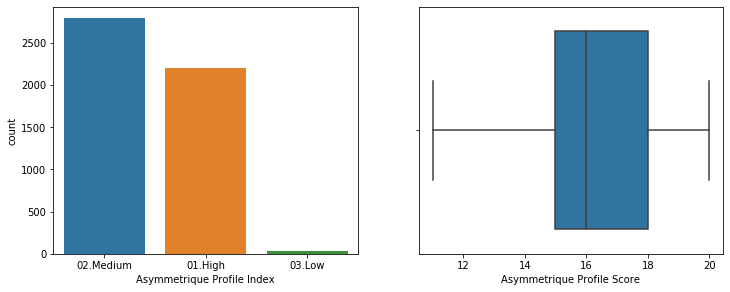

In [16]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.countplot(leads_data['Asymmetrique Profile Index'])
plt.subplot(2,2,2)
sns.boxplot(leads_data['Asymmetrique Profile Score'])
plt.show()

These columns have 45% null values. So we need to drop these.

In [17]:
leads_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'], axis=1, inplace=True)

`City` is the city of the customer

In [18]:
leads_data.City.describe()

count     5571  
unique    6     
top       Mumbai
freq      3222  
Name: City, dtype: object

Imputating with this attribute with the mode value i.e; Mumbai

In [19]:
leads_data['City'].fillna(leads_data['City'].mode()[0], inplace=True)

`Specailization`: The industry domain in which the customer worked before.<br> Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

In [20]:
leads_data.Specialization.describe()

count     5860              
unique    18                
top       Finance Management
freq      976               
Name: Specialization, dtype: object

There are chances that a category applicable to many of the interested candidates may not be avilable. So imputing null values as "Other_Specialization".

In [21]:
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Other_Specialization')

`Tags` : Tags assigned to customers indicating the current status of the lead.

In [22]:
leads_data.Tags.describe()

count     5887                               
unique    26                                 
top       Will revert after reading the email
freq      2072                               
Name: Tags, dtype: object

In [23]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.
leads_data['Tags'] = leads_data['Tags'].replace(np.nan, 'Will revert after reading the email')

What matters most to you in choosing a course: An option selected by the customer indicating what is their main motto behind doing this course.

In [24]:
leads_data['What matters most to you in choosing a course'].describe()

count     6531                   
unique    3                      
top       Better Career Prospects
freq      6528                   
Name: What matters most to you in choosing a course, dtype: object

In [25]:
#Null values can be imputed with mode 
leads_data['What matters most to you in choosing a course'].fillna(leads_data['What matters most to you in choosing a course'].mode()[0], inplace=True)

`Occupation`: Indicates whether the customer is a student, umemployed or employed.

In [26]:
leads_data['What is your current occupation'].describe()

count     6550      
unique    6         
top       Unemployed
freq      5600      
Name: What is your current occupation, dtype: object

In [27]:
#Imputing the null values with the mode
leads_data['What is your current occupation'].fillna(leads_data['What is your current occupation'].mode()[0], inplace=True)

Country

In [28]:
leads_data['Country'].describe()

count     6779 
unique    38   
top       India
freq      6492 
Name: Country, dtype: object

In [29]:
#Imputing the null values with the mode
leads_data['Country'].fillna(leads_data['Country'].mode()[0], inplace=True)

`Lead Source`

In [30]:
leads_data['Lead Source'].describe()

count     9204  
unique    21    
top       Google
freq      2868  
Name: Lead Source, dtype: object

In [31]:
#Imputing the null values with the mode
leads_data['Lead Source'].fillna(leads_data['Lead Source'].mode()[0], inplace=True)

`TotalVisits`

In [32]:
leads_data.TotalVisits.describe()

count    9103.000000
mean     3.445238   
std      4.854853   
min      0.000000   
25%      1.000000   
50%      3.000000   
75%      5.000000   
max      251.000000 
Name: TotalVisits, dtype: float64

In [33]:
#imputing with mean
leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].mean(), inplace=True)

`Page Views Per Visit`

In [34]:
leads_data['Page Views Per Visit'].describe()

count    9103.000000
mean     2.362820   
std      2.161418   
min      0.000000   
25%      1.000000   
50%      2.000000   
75%      3.000000   
max      55.000000  
Name: Page Views Per Visit, dtype: float64

In [35]:
#Imputing with mean as there is not much diffrence b/w mean & median
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].mean(), inplace=True)

`Last Activity`

In [36]:
leads_data['Last Activity'].describe()


count     9137        
unique    17          
top       Email Opened
freq      3437        
Name: Last Activity, dtype: object

In [37]:
#Imputing with mode 
leads_data['Last Activity'].fillna(leads_data['Last Activity'].mode()[0], inplace=True)

In [38]:
leads_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [39]:
leads_data.to_csv('Leads_Cleaned')

# Step 3: Exploratory Data Analysis

#### Univariate Analysis

`Converted` variable is target variable here which indicates whether a lead is converted or not.

In [40]:
converted= sum(leads_data['Converted'])/len(leads_data['Converted'].index) *100
converted

38.53896103896104

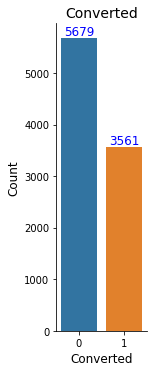

In [41]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leads_data, aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

`Lead Origin`:: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

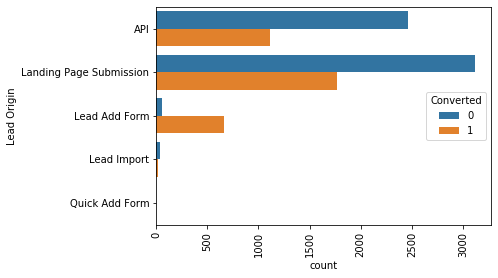

In [42]:
sns.countplot(y = "Lead Origin", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

`Conclusion`:<br> 
API and Landing Page Submission have average conversion rate but count of lead originated from them are considerable.<br>
Lead Add Form has considerable conversion rate but count of lead are not very high.<br>
Lead Import are very less in count.

`Lead Source` :The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

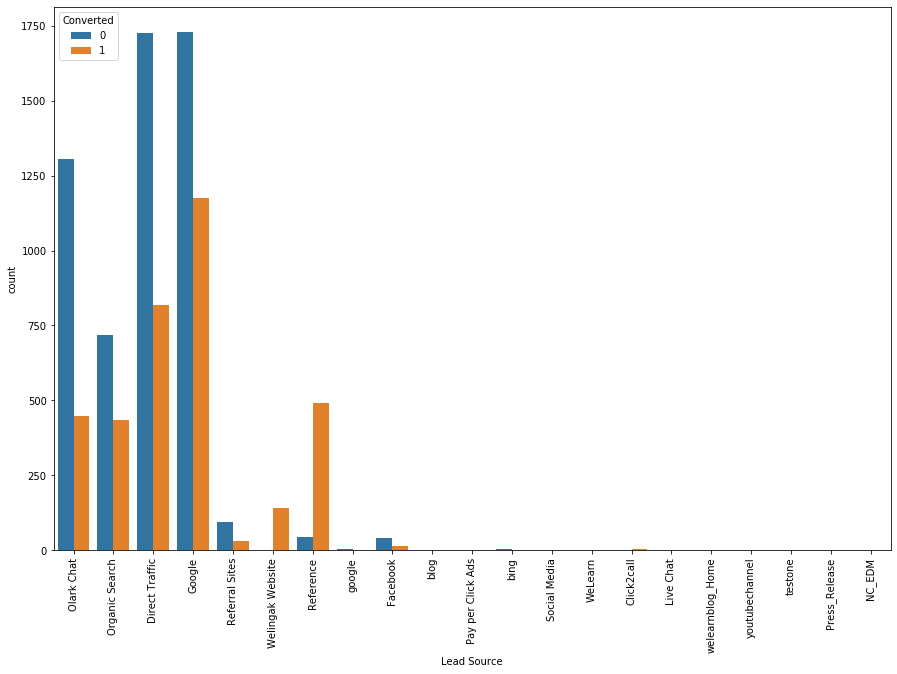

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [44]:
leads_data['Lead Source']= leads_data['Lead Source'].replace('google', 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

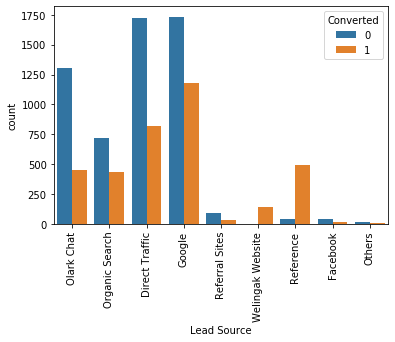

In [45]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

`Conclusion`: <br>
Google and Direct traffic generates maximum number of leads.<br>
Conversion Rate of reference leads and leads through welingak website is also high.<br>
But Olark Chat and Organic Search can't be ignored.

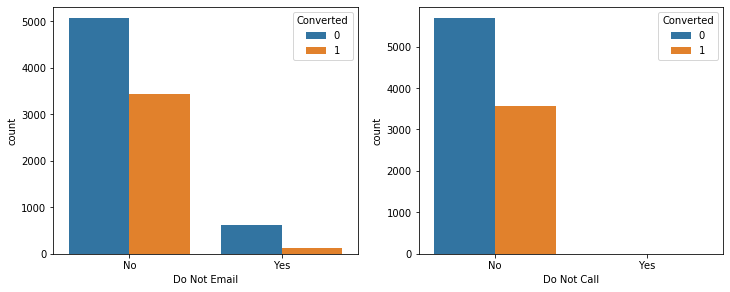

In [46]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_data)
plt.subplot(222)
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_data)
plt.show()

`Conclusion`: Most of the customers (either from converted or non converted group) prefer not to email and not to call them.

TotalVisits

In [47]:
leads_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean     3.445238   
std      4.818723   
min      0.000000   
5%       0.000000   
25%      1.000000   
50%      3.000000   
75%      5.000000   
90%      7.000000   
95%      10.000000  
99%      17.000000  
max      251.000000 
Name: TotalVisits, dtype: float64

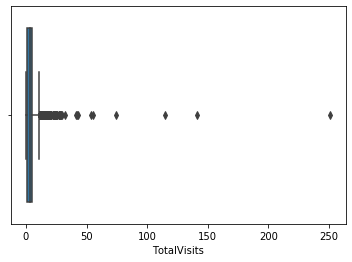

In [48]:
sns.boxplot(leads_data['TotalVisits'])

In [49]:
# There are many outliers, lets cap at 5th & 95th percentile
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

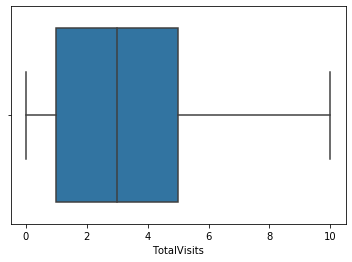

In [50]:
#plotting after the capping

sns.boxplot(leads_data['TotalVisits'])

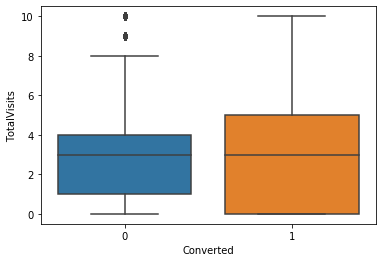

In [51]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)

`Conclusion`: Median Value for both (converted/ non converted) appears to be the same.<br> But there are few outliers in non converted group with values similar to converted group.

In [52]:
leads_data['Total Time Spent on Website'].describe()

count    9240.000000
mean     487.698268 
std      548.021466 
min      0.000000   
25%      12.000000  
50%      248.000000 
75%      936.000000 
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

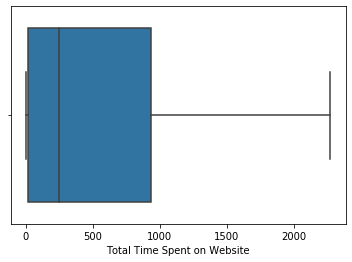

In [53]:
sns.boxplot(leads_data['Total Time Spent on Website'])

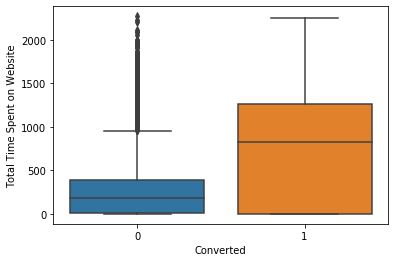

In [54]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)

`Conclusion`: Median Value for the aspiring group is much higher in comparison to the couter group. It indicates that the people who spend more time on the website tend to convert into customers. <br> But there are outliers as seen above who spend more time but lie in non converted category.

`Page Views Per Visit`: Average number of pages on the website viewed during the visits.

In [55]:
leads_data['Page Views Per Visit'].describe()

count    9240.000000
mean     2.362820   
std      2.145333   
min      0.000000   
25%      1.000000   
50%      2.000000   
75%      3.000000   
max      55.000000  
Name: Page Views Per Visit, dtype: float64

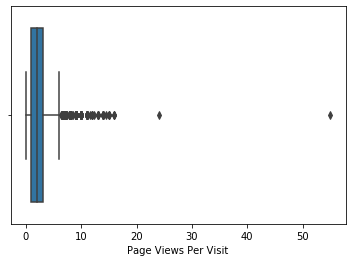

In [56]:
sns.boxplot(leads_data['Page Views Per Visit'])

In [57]:
#capping the variable
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

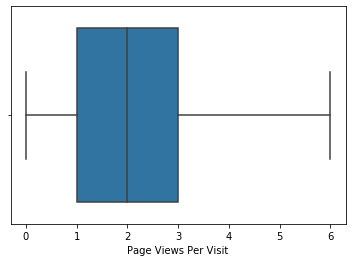

In [58]:
sns.boxplot(leads_data['Page Views Per Visit'])

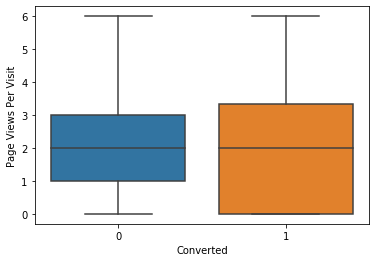

In [59]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)

`Conclusion`: Median Value appears to be the same in both cases.

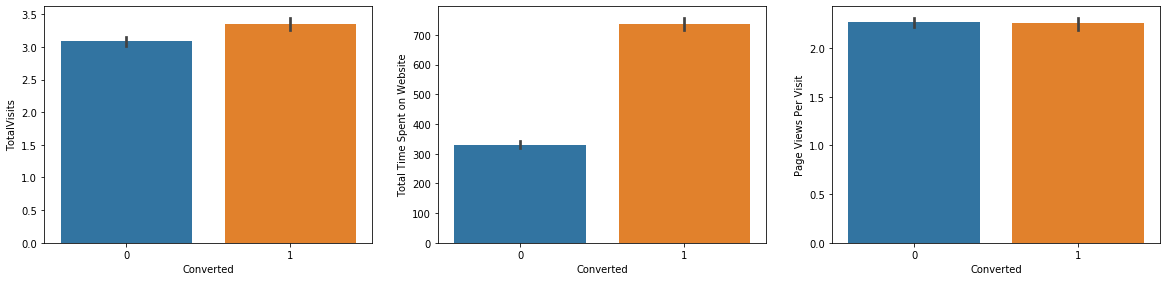

In [60]:
# Now check the conversions for all continous values
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = leads_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = leads_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = leads_data)
plt.show()

In [61]:
leads_data['Last Activity'].describe()

count     9240        
unique    17          
top       Email Opened
freq      3540        
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

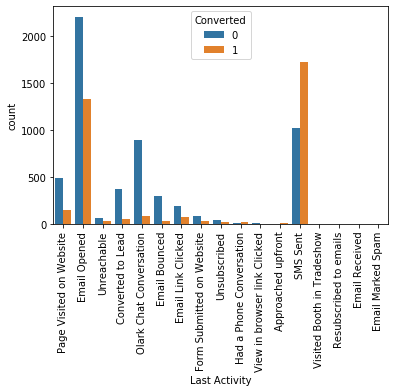

In [62]:
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

In [63]:
# Let's keep major last activities as such and club all others to "Other_Activity"
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

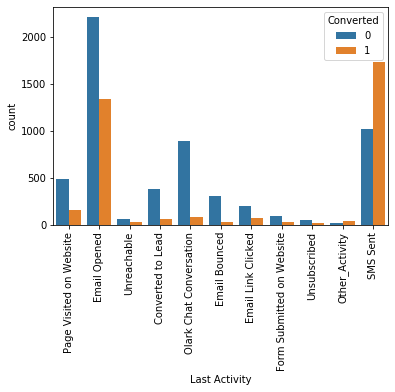

In [64]:
sns.countplot(x='Last Activity', hue='Converted', data= leads_data)
plt.xticks(rotation=90)
plt.show()

`Conclusion`: SMS Sent is the last activity for the  maximum converted leads followed by Email opened. But reverse trend can be seen in the non converted category.

Country

In [65]:
leads_data.Country.describe()

count     9240 
unique    38   
top       India
freq      8953 
Name: Country, dtype: object

`Conclusion`: Most of the leads generated are from India.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

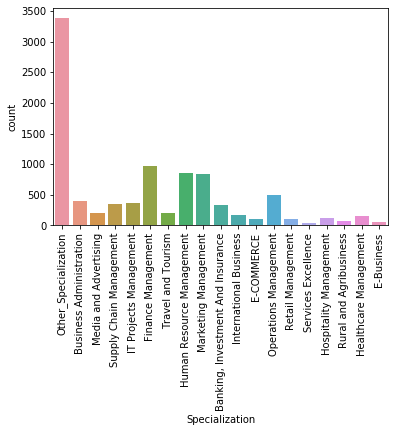

In [66]:
#Specializtaion
sns.countplot(leads_data['Specialization'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

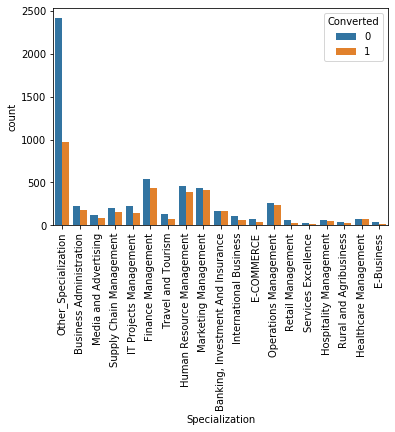

In [67]:
sns.countplot(x="Specialization", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

`Conclusion`: More emphasis should be given to Finance Management,Marketing management, Human Resourse Managment & Operations Management as chances of conversion are relatively higher in comparison to other categories.

In [68]:
#Occupation
leads_data['What is your current occupation'].describe()

count     9240      
unique    6         
top       Unemployed
freq      8290      
Name: What is your current occupation, dtype: object

In [69]:
leads_data['What is your current occupation'].replace('Other','Other_Occupation ', inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

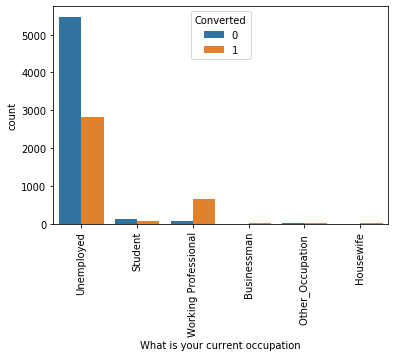

In [70]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

`Conclusion`: Unemployed people tend to convert more as compared to other occupation. <br> Working Professional tends to convert may be they want to upskill.

In [71]:
leads_data['What matters most to you in choosing a course'].describe()

count     9240                   
unique    3                      
top       Better Career Prospects
freq      9237                   
Name: What matters most to you in choosing a course, dtype: object

In [72]:
leads_data['Search'].describe()

count     9240
unique    2   
top       No  
freq      9226
Name: Search, dtype: object

In [73]:
leads_data.Magazine.describe()

count     9240
unique    1   
top       No  
freq      9240
Name: Magazine, dtype: object

In [74]:
leads_data['Newspaper Article'].describe()

count     9240
unique    2   
top       No  
freq      9238
Name: Newspaper Article, dtype: object

In [75]:
leads_data['X Education Forums'].describe()

count     9240
unique    2   
top       No  
freq      9239
Name: X Education Forums, dtype: object

In [76]:
leads_data['Newspaper'].describe()

count     9240
unique    2   
top       No  
freq      9239
Name: Newspaper, dtype: object

In [77]:
leads_data['Digital Advertisement'].describe()

count     9240
unique    2   
top       No  
freq      9236
Name: Digital Advertisement, dtype: object

In [78]:
leads_data['Through Recommendations'].describe()

count     9240
unique    2   
top       No  
freq      9233
Name: Through Recommendations, dtype: object

In [79]:
leads_data['Receive More Updates About Our Courses'].describe()

count     9240
unique    1   
top       No  
freq      9240
Name: Receive More Updates About Our Courses, dtype: object

In [80]:
leads_data['Update me on Supply Chain Content'].describe()

count     9240
unique    1   
top       No  
freq      9240
Name: Update me on Supply Chain Content, dtype: object

In [81]:
leads_data['Update me on Supply Chain Content'].describe()

count     9240
unique    1   
top       No  
freq      9240
Name: Update me on Supply Chain Content, dtype: object

`Conclusion` : These columns are highly skewed , so that they dont add any value to the model learning process. Nothisng canbe inferred from these. These are as follows:<br>
Country, What is your current occupation, What matters most to you in choosing a course, Search , Magazine, Newspaper Article, Newspaper, X Education Forums, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque 

In [82]:
leads_data['Tags'].describe()

count     9240                               
unique    26                                 
top       Will revert after reading the email
freq      5425                               
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

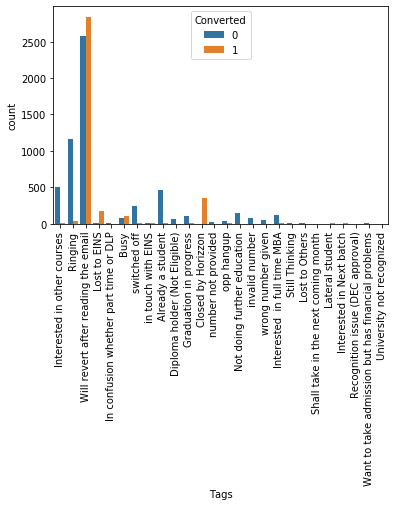

In [83]:
sns.countplot(x = "Tags", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

In [84]:
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')#converting the insignificant ones to one single category


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

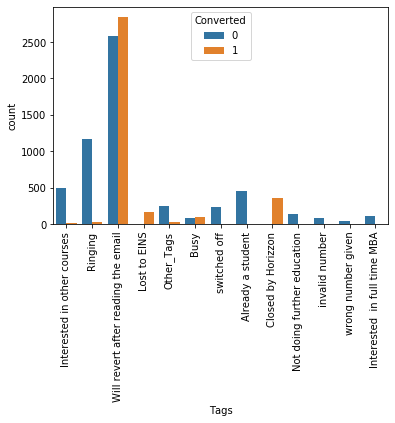

In [85]:
sns.countplot(x = "Tags", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

`Conclusion`: Those who are responding to emails are more likely to convert.

In [86]:
leads_data['Lead Quality'].describe()

count     9240    
unique    4       
top       Not Sure
freq      7419    
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

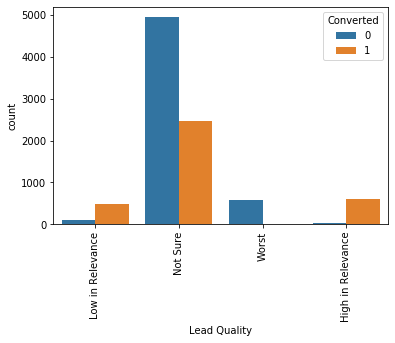

In [87]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

`Conclusion`: The maximum number of both categories of leads are in the "Not Sure" value

In [88]:
leads_data['I agree to pay the amount through cheque'].describe()

count     9240
unique    1   
top       No  
freq      9240
Name: I agree to pay the amount through cheque, dtype: object

In [89]:
leads_data['A free copy of Mastering The Interview'].describe()

count     9240
unique    2   
top       No  
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

In [90]:
leads_data.City.describe()

count     9240  
unique    6     
top       Mumbai
freq      6891  
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

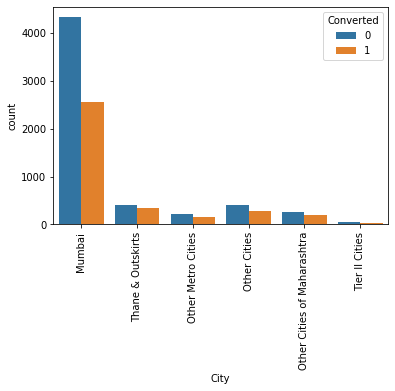

In [91]:
sns.countplot(x = "City", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

`Conclusion`: Mumbai is the city with max number of converted as non converted leads.

In [92]:
leads_data['Last Activity'].describe()

count     9240        
unique    11          
top       Email Opened
freq      3540        
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

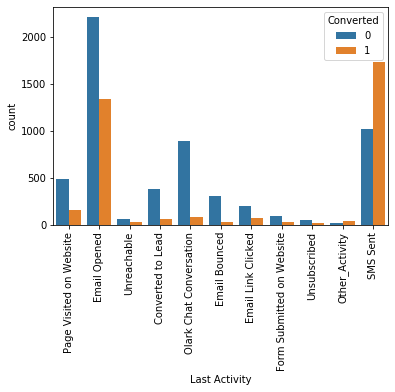

In [93]:
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

In [94]:
leads_data['Last Notable Activity'].describe()

count     9240    
unique    16      
top       Modified
freq      3407    
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

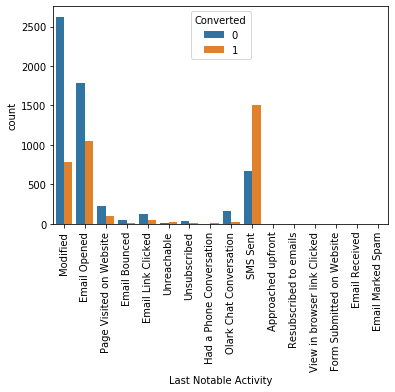

In [95]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

##### Based on the above univariate analysis, some of the categorical columns are highly skewed. Thus they wont be adding any info to the model.

In [96]:
list_to_be_dropped=['Lead Quality','Tags','Last Activity','Lead Number','Do Not Email', 'Do Not Call','Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article','Newspaper', 'X Education Forums', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'] 

In [97]:
len(list_to_be_dropped)

19

In [98]:
leads_data.shape

(9240, 31)

In [99]:
leads_data.drop(list_to_be_dropped, axis=1, inplace=True)
leads_data.head(2)

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Other_Specialization,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Other_Specialization,Unemployed,Mumbai,No,Email Opened


In [100]:
leads_data.shape

(9240, 12)

# Step 4 : Data Preparation

In [101]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [102]:
leads_data.head(2)

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Other_Specialization,Unemployed,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Other_Specialization,Unemployed,Mumbai,0,Email Opened


In [103]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'What is your current occupation','Lead Source','Specialization','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [104]:
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Other_Specialization,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Other_Specialization,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Other_Specialization,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [105]:
leads_data.drop(['Lead Origin', 'Lead Source', 'What is your current occupation', 'City','Specialization','Last Notable Activity'], axis=1, inplace=True)
leads_data.shape

(9240, 61)

# Step 5:  Test Train Split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# Putting feature variable to X
X = leads_data.drop(['Prospect ID','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,4.0,487,1.33,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [112]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.152121,-0.885371,-1.269958,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.297240,0.005716,-0.519633,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.659580,-0.691418,0.140427,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.659580,1.365219,1.550812,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-1.152121,-0.885371,-1.269958,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Looking at Correlations

In [113]:
leads_data.shape

(9240, 61)

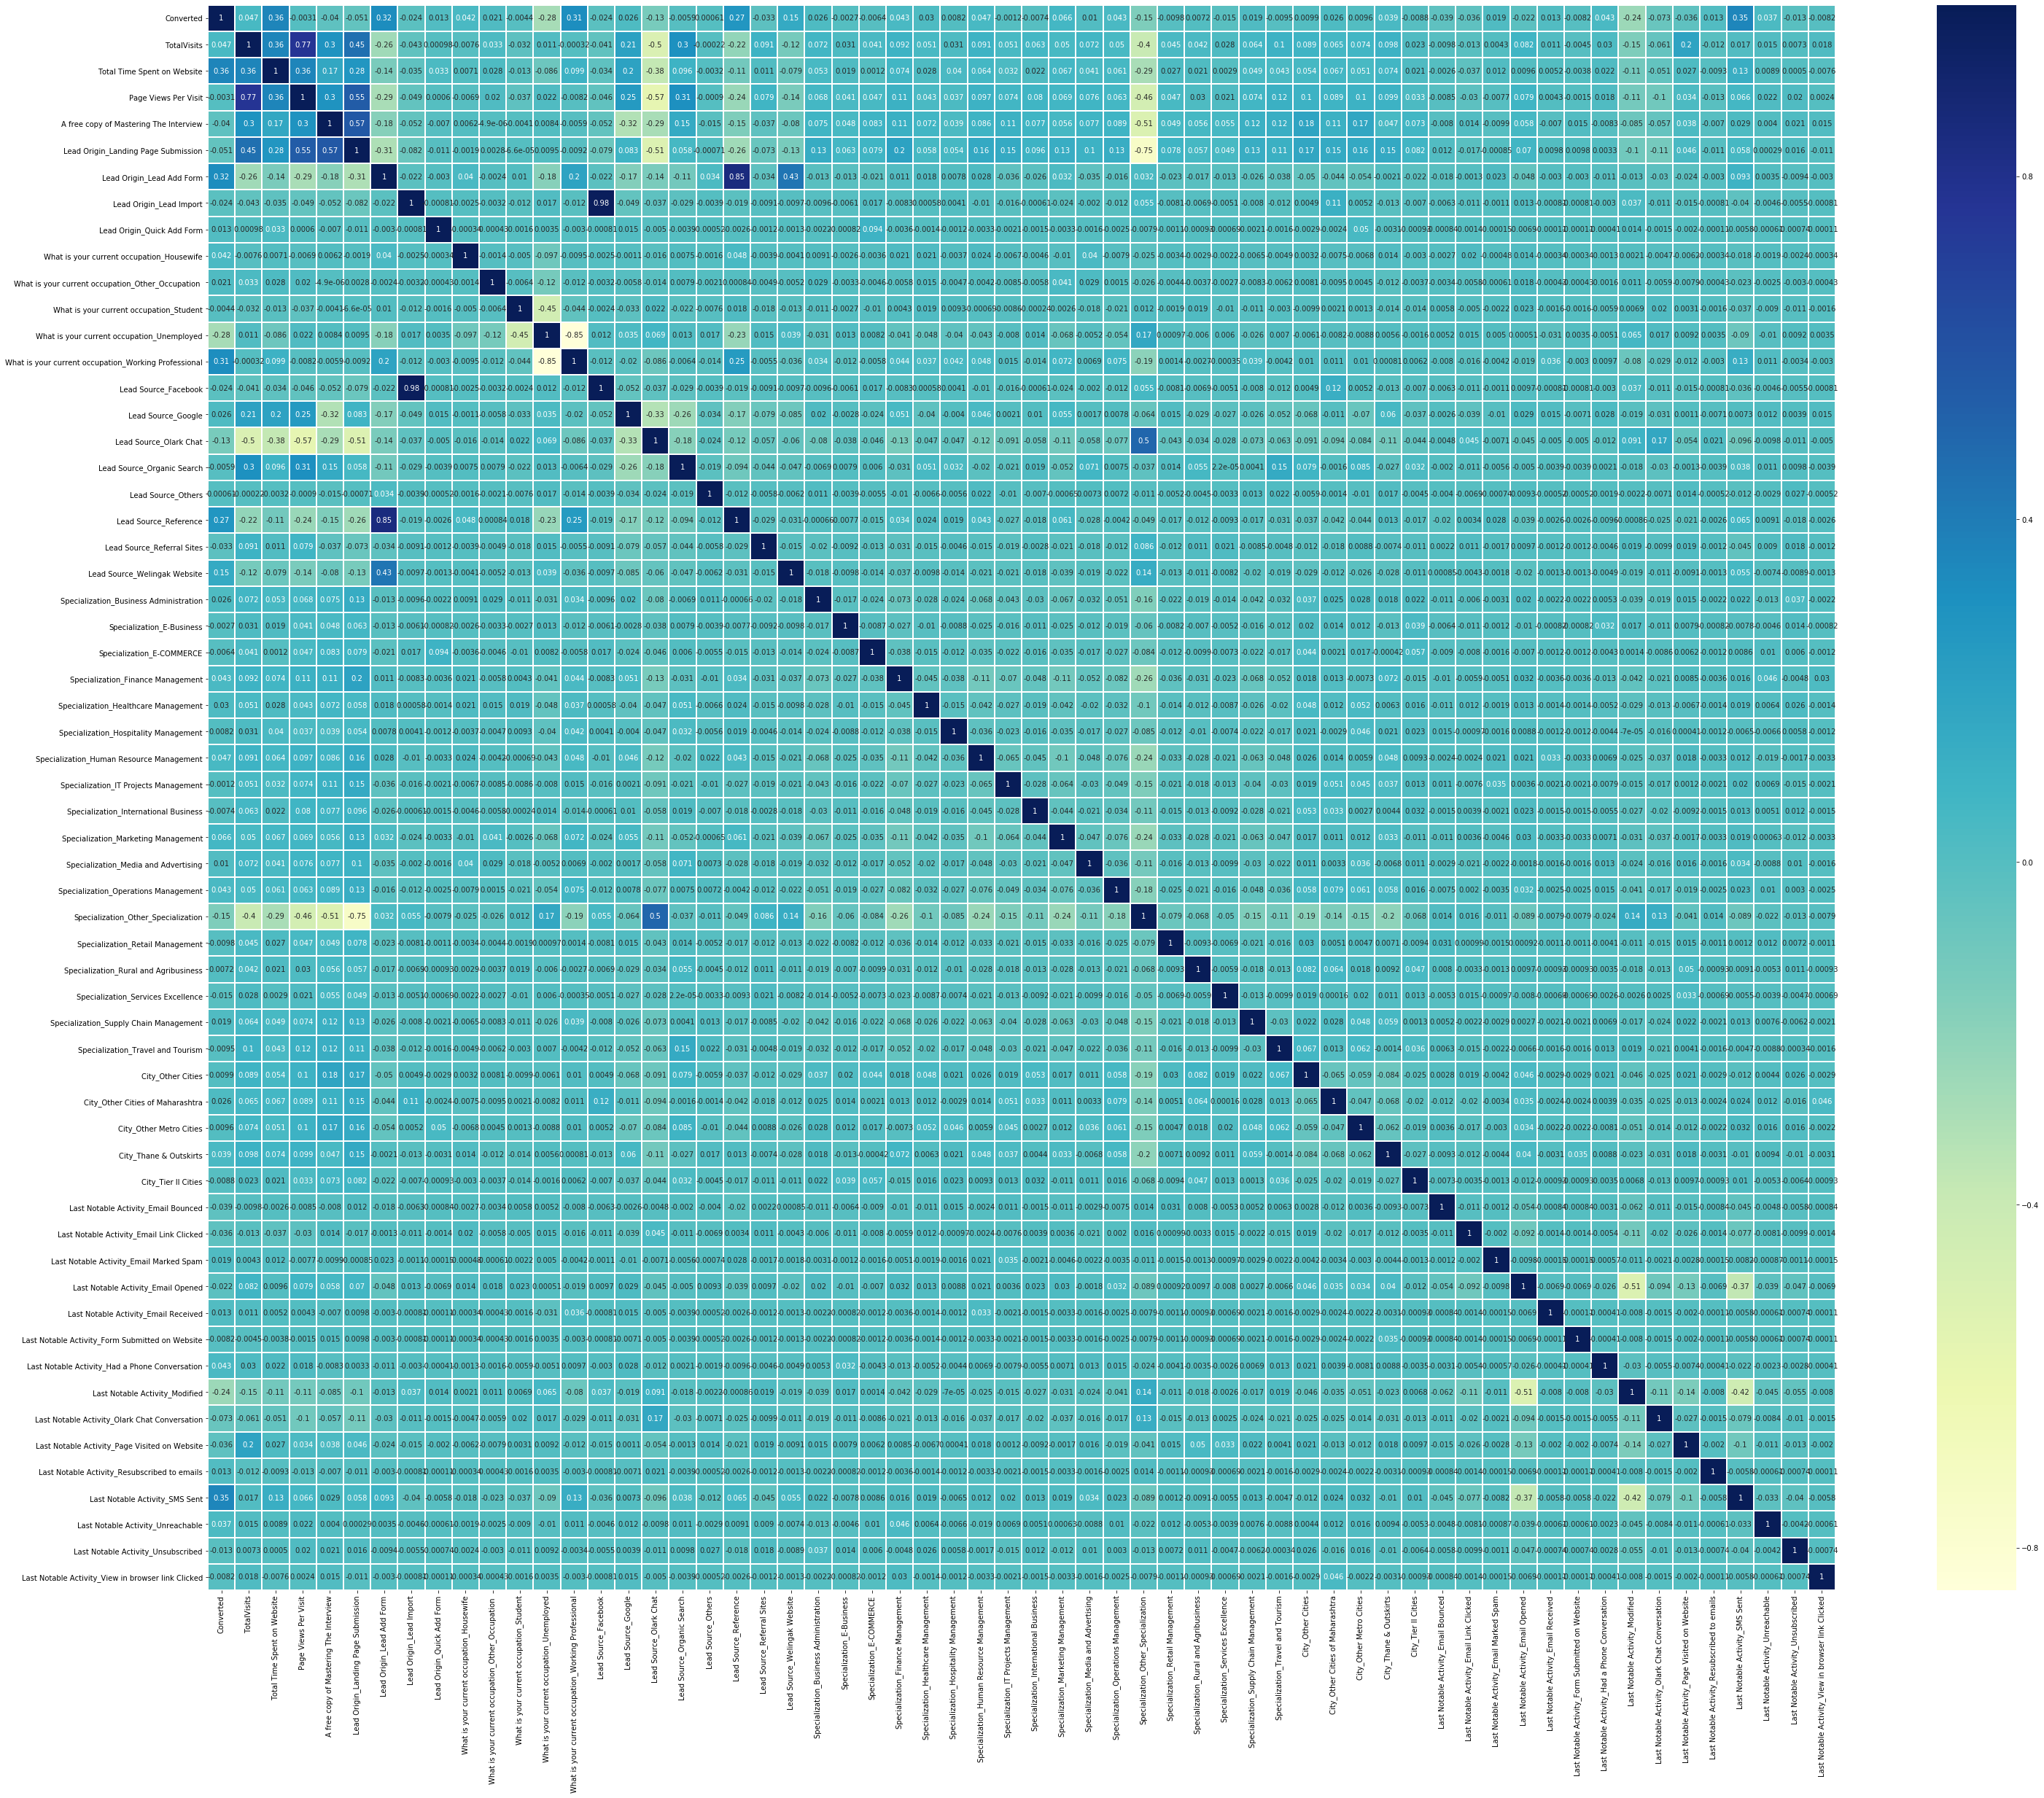

In [114]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 40))
ax=sns.heatmap(leads_data.corr(), annot = True, cmap="YlGnBu",linewidths=1)
bottom,top =ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

Dropping highly correlated dummy variables: <br>Lead Origin_Lead Add Form and Lead Source_Reference  0.85 <br> Lead Origin Lead Import and Lead Source Facebook 0.98


In [115]:
high_corr_df=['Lead Origin_Lead Add Form','Lead Source_Facebook']
X_test=X_test.drop(high_corr_df,1)
X_train=X_train.drop(high_corr_df,1)

# Step 7 :Model Building

Running our first model

In [116]:
import statsmodels.api as sm

In [117]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Jul 2020   Deviance:                          nan
Time:                        21:17:26   Pearson chi2:                 7.12e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 -3.98e+14   2.77e+07  -1.44e+07      0.000   -3.98e+14   -3.98e+14
TotalVisits                                           1.654e+14    1.4e+06   1.18e+08      0.000    1.65e+14    1.65e+14
Total Time Spent on Website                           8.175e+14   9.48e+05   8.62e+08      0.000    8.17e+14    8.17e+14
Page Views Per Visit                                 -2.529e+14   1.52e+06  -1.66e+08      0.000   -2.53e+14   -2.53e+14
A free copy of Mastering The Interview               -1.341e+14   2.68e+06  -5.01e+07      0.000   -1.34e+14   -1.34e+14
Lead Origin_Landing Page Submission                  -5.097e+14   3.36e+06  -1.52e+08      0.000    -5.1e+14    -5.1e+14
Lead Origin_Lead Import                              -7.429e+12   1.22e+07   -6.1e+05      0.000   -7.43e+12   -7.43e+12
Lead Origin_Quick Add Form                            3.542e+15   6.78e+07   5.22e+07      0.000    3.54e+15    3.54e+15
What is your current occupation_Housewife             4.178e+15   3.56e+07   1.17e+08      0.000    4.18e+15    4.18e+15
What is your current occupation_Other_Occupation      3.883e+14   3.64e+07   1.07e+07      0.000    3.88e+14    3.88e+14
What is your current occupation_Student               1.292e+15   2.82e+07   4.58e+07      0.000    1.29e+15    1.29e+15
What is your current occupation_Unemployed            1.055e+15   2.76e+07   3.82e+07      0.000    1.06e+15    1.06e+15
What is your current occupation_Working Professional  2.409e+15   2.78e+07   8.68e+07      0.000    2.41e+15    2.41e+15
Lead Source_Google                                     1.67e+14   2.82e+06   5.92e+07      0.000    1.67e+14    1.67e+14
Lead Source_Olark Chat                                6.912e+14   3.84e+06    1.8e+08      0.000    6.91e+14    6.91e+14
Lead Source_Organic Search                            6.232e+13   3.26e+06   1.91e+07      0.000    6.23e+13    6.23e+13
Lead Source_Others                                    6.252e+14    1.6e+07    3.9e+07      0.000    6.25e+14    6.25e+14
Lead Source_Reference                                 1.535e+15   5.08e+06   3.02e+08      0.000    1.53e+15    1.53e+15
Lead Source_Referral Sites                            3.429e+13   7.57e+06   4.53e+06      0.000    3.43e+13    3.43e+13
Lead Source_Welingak Website                           2.84e+15   7.77e+06   3.65e+08      0.000    2.84e+15    2.84e+15
Specialization_Business Administration               -1.081e+14   6.02e+06   -1.8e+07      0.000   -1.08e+14   -1.08e+14
Specialization_E-Business                            -2.695e+14    1.2e+07  -2.25e+07      0.000   -2.69e+14   -2.69e+14
Specialization_E-COMMERCE                             1.03

Feature Selection Using RFE

In [118]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False, False])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Origin_Quick Add Form', False, 35),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other_Occupation ', False, 6),
 ('What is your current occupation_Student', False, 10),
 ('What is your current occupation_Unemployed', False, 5),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-Business', False, 37),
 ('Specializat

In [121]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'What is your current occupation_Housewife', 'What is your current occupation_Working Professional', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_Other_Specialization', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'], dtype='object')

 $ Assessing the model with StatsModels

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.6
Date:                Mon, 20 Jul 2020   Deviance:                       5433.2
Time:                        21:17:29   Pearson chi2:                 7.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1014      0.125     -0.810      0.418      -0.347       0.144
Total Time Spent on Website                              1.0730      0.039     27.530      0.000       0.997       1.149
Lead Origin_Landing Page Submission                     -1.2501      0.126     -9.923      0.000      -1.497      -1.003
What is your current occupation_Housewife               23.0623   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Working Professional     2.6279      0.191     13.726      0.000       2.253       3.003
Lead Source_Olark Chat                                   0.7908      0.116      6.789      0.000       0.563       1.019
Lead Source_Reference                                    3.2093      0.218     14.717      0.000       2.782       3.637
Lead Source_Welingak Website                             5.6647      0.727      7.788      0.000       4.239       7.090
Specialization_Hospitality Management                   -1.0910      0.330     -3.308      0.001      -1.738      -0.444
Specialization_Other_Specialization                     -1.1980      0.121     -9.874      0.000      -1.436      -0.960
Last Notable Activity_Had a Phone Conversation           3.3246      1.108      3.001      0.003       1.153       5.496
Last Notable Activity_Modified                          -0.7328      0.083     -8.828      0.000      -0.896      -0.570
Last Notable Activity_Olark Chat Conversation           -1.1716      0.337     -3.478      0.001      -1.832      -0.511
Last Notable Activity_Resubscribed to emails            24.0246   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                           1.4137      0.084     16.782      0.000       1.249       1.579
Last Notable Activity_Unreachable                        1.4957      0.513      2.918      0.004       0.491       2.500
========================================================================================================================
"""

In [123]:
col=col.drop(['What is your current occupation_Housewife'],1)

In [124]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'What is your current occupation_Working Professional', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_Other_Specialization', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'], dtype='object')

In [125]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.4
Date:                Mon, 20 Jul 2020   Deviance:                       5448.7
Time:                        21:17:29   Pearson chi2:                 7.20e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0973      0.125     -0.778      0.437      -0.342       0.148
Total Time Spent on Website                              1.0719      0.039     27.540      0.000       0.996       1.148
Lead Origin_Landing Page Submission                     -1.2445      0.126     -9.887      0.000      -1.491      -0.998
What is your current occupation_Working Professional     2.6200      0.191     13.691      0.000       2.245       2.995
Lead Source_Olark Chat                                   0.7897      0.116      6.784      0.000       0.562       1.018
Lead Source_Reference                                    3.2236      0.218     14.806      0.000       2.797       3.650
Lead Source_Welingak Website                             5.6630      0.727      7.786      0.000       4.237       7.089
Specialization_Hospitality Management                   -1.0981      0.330     -3.331      0.001      -1.744      -0.452
Specialization_Other_Specialization                     -1.2016      0.121     -9.911      0.000      -1.439      -0.964
Last Notable Activity_Had a Phone Conversation           3.3152      1.108      2.993      0.003       1.144       5.486
Last Notable Activity_Modified                          -0.7304      0.083     -8.819      0.000      -0.893      -0.568
Last Notable Activity_Olark Chat Conversation           -1.1731      0.337     -3.483      0.000      -1.833      -0.513
Last Notable Activity_Resubscribed to emails            22.0243   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_SMS Sent                           1.4074      0.084     16.723      0.000       1.242       1.572
Last Notable Activity_Unreachable                        1.4888      0.512      2.905      0.004       0.484       2.493
========================================================================================================================
"""

In [126]:
col=col.drop(['Last Notable Activity_Resubscribed to emails'], 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'What is your current occupation_Working Professional', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_Other_Specialization', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'], dtype='object')

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2726.0
Date:                Mon, 20 Jul 2020   Deviance:                       5452.1
Time:                        21:17:30   Pearson chi2:                 7.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0975      0.125     -0.779      0.436      -0.343       0.148
Total Time Spent on Website                              1.0717      0.039     27.537      0.000       0.995       1.148
Lead Origin_Landing Page Submission                     -1.2429      0.126     -9.877      0.000      -1.490      -0.996
What is your current occupation_Working Professional     2.6197      0.191     13.690      0.000       2.245       2.995
Lead Source_Olark Chat                                   0.7945      0.116      6.830      0.000       0.567       1.023
Lead Source_Reference                                    3.2243      0.218     14.810      0.000       2.798       3.651
Lead Source_Welingak Website                             5.6627      0.727      7.785      0.000       4.237       7.088
Specialization_Hospitality Management                   -1.0977      0.330     -3.329      0.001      -1.744      -0.451
Specialization_Other_Specialization                     -1.1995      0.121     -9.895      0.000      -1.437      -0.962
Last Notable Activity_Had a Phone Conversation           3.3139      1.108      2.992      0.003       1.143       5.485
Last Notable Activity_Modified                          -0.7329      0.083     -8.853      0.000      -0.895      -0.571
Last Notable Activity_Olark Chat Conversation           -1.1780      0.337     -3.498      0.000      -1.838      -0.518
Last Notable Activity_SMS Sent                           1.4051      0.084     16.702      0.000       1.240       1.570
Last Notable Activity_Unreachable                        1.4869      0.512      2.902      0.004       0.483       2.491
========================================================================================================================
"""

#### Checking VIFs

In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Other_Specialization,2.20
3,Lead Source_Olark Chat,1.90
9,Last Notable Activity_Modified,1.89
1,Lead Origin_Landing Page Submission,1.74
11,Last Notable Activity_SMS Sent,1.61
0,Total Time Spent on Website,1.23
4,Lead Source_Reference,1.23
2,What is your current occupation_Working Professional,1.20
10,Last Notable Activity_Olark Chat Conversation,1.08
5,Lead Source_Welingak Website,1.07


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [129]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.437372
6795    0.073525
3516    0.223833
8105    0.821692
3934    0.101176
4844    0.990815
3297    0.106921
8071    0.991281
987     0.200926
7423    0.902410
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43737206, 0.07352501, 0.2238332 , 0.82169247, 0.10117623,
       0.99081539, 0.10692089, 0.99128109, 0.20092606, 0.90241044])

##### Creating a dataframe with the actual Converted value and the predicted probabilities

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.437372,1871
1,0,0.073525,6795
2,0,0.223833,3516
3,0,0.821692,8105
4,0,0.101176,3934


##### Creating new column 'Converted' with 1 if Conversion_Prob > 0.5 else 0

In [132]:
y_train_pred_final['predicted_0.5'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted_0.5
0,0,0.437372,1871,0
1,0,0.073525,6795,0
2,0,0.223833,3516,0
3,0,0.821692,8105,1
4,0,0.101176,3934,0


In [133]:
from sklearn import metrics

In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['predicted_0.5'] )
print(confusion)

[[3601  401]
 [ 859 1607]]


In [135]:
# Predicted     not_converted    converted
# Actual
# not_churn        3601        401
# churn            859         1607

In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['predicted_0.5']))

0.8051948051948052


#####  Metrics beyond simply accuracy

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives

FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6516626115166261

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.899800099950025

In [140]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10019990004997502


In [141]:
# positive predictive value 
print (TP / float(TP+FP))

0.8002988047808764


In [142]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8073991031390134


# Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted_0.5
0,0,0.437372,1871,0
1,0,0.073525,6795,0
2,0,0.223833,3516,0
3,0,0.821692,8105,1
4,0,0.101176,3934,0


In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

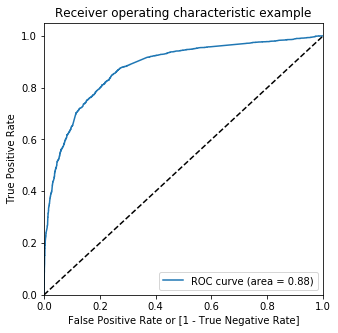

In [146]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.437372,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073525,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.223833,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.821692,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.101176,3934,0,1,1,0,0,0,0,0,0,0,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.381262  1.000000  0.000000
0.1  0.1   0.543599  0.970803  0.280360
0.2  0.2   0.771490  0.885645  0.701149
0.3  0.3   0.791899  0.844688  0.759370
0.4  0.4   0.807359  0.761963  0.835332
0.5  0.5   0.805195  0.651663  0.899800
0.6  0.6   0.796537  0.582320  0.928536
0.7  0.7   0.786024  0.520276  0.949775
0.8  0.8   0.761132  0.421330  0.970515
0.9  0.9   0.716605  0.277372  0.987256


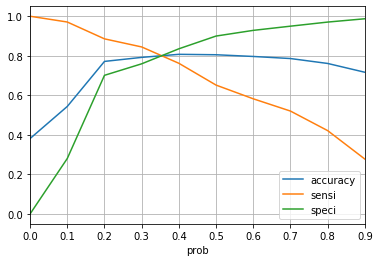

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show(plt.grid(True,'major'))
plt.show()

#### From the curve above, 0.35  is the optimum point to take it as a cutoff probability.

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.437372,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.073525,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.223833,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.821692,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.101176,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7993197278911565

In [152]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3194,  808],
       [ 490, 1976]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8012976480129764

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.7981009495252374

In [156]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))


0.20189905047476261


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7097701149425287


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8669923995656895


### Precision & Recall


In [159]:
y_train_pred_final.tail()

,Converted,Conversion_Prob,Prospect ID,predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6463,1,0.259928,350,0,1,1,1,0,0,0,0,0,0,0,0
6464,1,0.987253,79,1,1,1,1,1,1,1,1,1,1,1,1
6465,1,0.189797,8039,0,1,1,0,0,0,0,0,0,0,0,0
6466,0,0.072062,6936,0,1,0,0,0,0,0,0,0,0,0,0
6467,0,0.101176,5640,0,1,1,0,0,0,0,0,0,0,0,0


In [160]:

confusion2

array([[3194,  808],
       [ 490, 1976]], dtype=int64)

##### Precision
TP / TP + FP

In [161]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7097701149425287

##### Recall
TP / TP + FN

In [162]:
confusion2[1,1]/float(confusion2[1,0]+confusion2[1,1])

0.8012976480129764

In [163]:
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted']))
print(recall_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted']))
print(f1_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted']))


0.7097701149425287
0.8012976480129764
0.7527619047619047


### Precision and recall tradeoff

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
y_train_pred_final.Converted, y_train_pred_final['predicted_0.5']

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted_0.5, Length: 6468, dtype: int64)

In [166]:
y_train_pred_final.head(2)

,Converted,Conversion_Prob,Prospect ID,predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.437372,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.073525,6795,0,1,0,0,0,0,0,0,0,0,0,0


In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

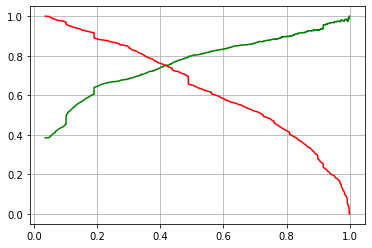

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show(plt.grid(True))
plt.show()

# Step 10: Making predictions on the test set


In [169]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,8.0,1011,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,5.0,59,5.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [170]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [171]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Other_Specialization,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,0,0,1,0,0,0,1,0
2376,-0.885371,0,0,0,1,0,0,1,0,0,0,1,0
7766,-0.777416,0,1,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,0,1,0,0,0,1,0,1,0,0,0
4359,-0.885371,0,0,0,1,0,0,0,0,0,0,0,0


In [172]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [173]:
y_test_pred = res.predict(X_test_sm)

In [174]:
y_test_pred[:10]

4269    0.758015
2376    0.915564
7766    0.959922
9199    0.101176
4359    0.898251
9186    0.578339
1631    0.424879
8963    0.151833
8007    0.087259
5324    0.361141
dtype: float64

In [175]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
# Let's see the head
y_pred_1.head()

,0
4269,0.758015
2376,0.915564
7766,0.959922
9199,0.101176
4359,0.898251


In [177]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [178]:
# Putting CustID to index
y_test_df['ProspectID'] = y_test_df.index

In [179]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head()

,Converted,ProspectID,0
0,1,4269,0.758015
1,1,2376,0.915564
2,1,7766,0.959922
3,0,9199,0.101176
4,1,4359,0.898251


In [182]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [183]:
y_pred_final.head(2)

,Converted,ProspectID,Conversion_Prob
0,1,4269,0.758015
1,1,2376,0.915564


In [184]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Conversion_Prob'], axis=1)

In [185]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [186]:
y_pred_final.head()

,Converted,ProspectID,Conversion_Prob,final_predicted
0,1,4269,0.758015,1
1,1,2376,0.915564,1
2,1,7766,0.959922,1
3,0,9199,0.101176,0
4,1,4359,0.898251,1


In [187]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8084415584415584

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1358,  319],
       [ 212,  883]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.806392694063927

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.8097793679189028

In [192]:
y_pred_final

,Converted,ProspectID,Conversion_Prob,final_predicted
0,1,4269,0.758015,1
1,1,2376,0.915564,1
2,1,7766,0.959922,1
3,0,9199,0.101176,0
4,1,4359,0.898251,1
...,...,...,...,...
2767,0,8649,0.151796,0
2768,1,2152,0.301378,0
2769,0,7101,0.189797,0
2770,0,5331,0.532735,1


In [193]:
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(y_pred_final.Converted, y_pred_final['final_predicted']))
print(recall_score(y_pred_final.Converted, y_pred_final['final_predicted']))
print(f1_score(y_pred_final.Converted, y_pred_final['final_predicted']))

0.7346089850249584
0.806392694063927
0.7688289072703527


In [194]:
#### Assigning Lead Score (Optional Step)

In [195]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.437372,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.073525,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.223833,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.821692,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.101176,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [196]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.437372,1871,0,1,1,1,1,1,0,0,0,0,0,1,44
1,0,0.073525,6795,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.223833,3516,0,1,1,1,0,0,0,0,0,0,0,0,22
3,0,0.821692,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.101176,3934,0,1,1,0,0,0,0,0,0,0,0,0,10


In [197]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,ProspectID,Conversion_Prob,final_predicted,Lead_Score
0,1,4269,0.758015,1,76
1,1,2376,0.915564,1,92
2,1,7766,0.959922,1,96
3,0,9199,0.101176,0,10
4,1,4359,0.898251,1,90


### Conclusion

-Based on the model, we observed that close to 80% values were rightly predicted by the model using optimal cut off value 0.35.<br>
-Total number of  significant features present in final model are 13 in count. <br>
-Test data Accuracy,Sensitivity and Specificity metrics are approximately matching with train data set metrics result. <br>
-We calculated Optimal Cut off using both Sensitivity-Specificity and Precision-Recall metrics and selected optimal cut off based from Sensitivity-Specificity  for final model prediction.<br>
-Top three variables in model which contribute most towards the probability of a lead getting converted are:<br>
--Lead Source_Welingak Website<br>
--Lead Source_Reference<br>
--Last Notable Activity_Had a Phone Conversation: